<center><h1>House prices</h1></center>

<h2>Competition description</h2>
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
<br><br>
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



<h2>Practice skills</h2>
<ul>
    <li>Creative feature engeneering</li>
    <li>Advanced regression techniques</li>
</ul>


## Data preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd 
import numpy as np 
pd.set_option("display.max_rows", 10, "display.max_columns", None)

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
# Features of the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print("Null values rate: ")
df.isnull().sum() / df.shape[0] * 100

Null values rate: 


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [5]:
# Drop features with more than 45% of missing values
drop_features = [] 

for rate, feature in zip((df.isnull().sum() / df.shape[0] * 100).values, df.columns): 
    if rate > 45: 
        drop_features.append(feature)
        
df.drop(drop_features, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

df.drop('Id', axis=1, inplace=True)
test_id = test.Id
test.drop('Id', axis=1, inplace=True)

df.shape

(1460, 75)

In [6]:
# Datatypes of features
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [7]:
# Separate object and numerical features
cat_features = [] 
int_features = []
float_features = [] 

for feature, dtype in zip(df.columns, df.dtypes.values): 
    if dtype == 'O': 
        cat_features.append(feature)
    elif dtype == 'float64': 
        float_features.append(feature)
    elif dtype == 'int64': 
        int_features.append(feature)
    else: 
        print("Not categorized")
        
print("Categorical features: ")
print(cat_features)
print()
print("Numerical features (float): ")
print(float_features)
print()
print("Numerical features (integer): ")
print(int_features)

Categorical features: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical features (float): 
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Numerical features (integer): 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDec

### Handle missing values

In [8]:
df[float_features].isnull().sum() / df[float_features].shape[0] * 100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [9]:
from sklearn.impute import SimpleImputer

for feature in df.columns: 
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df[feature] = imputer.fit_transform(df[feature].values.reshape(-1, 1))
    
    if feature != 'SalePrice': 
        test[feature] = imputer.transform(test[feature].values.reshape(-1, 1))
    
df.isnull().sum() / df.shape[0] * 100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [10]:
# Test set null values
test.isnull().sum().sum()

0

## Exploratory data analysis and Feature Engeneering

<Figure size 864x576 with 0 Axes>

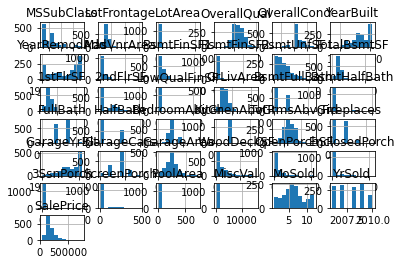

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 8))
df.hist(); 

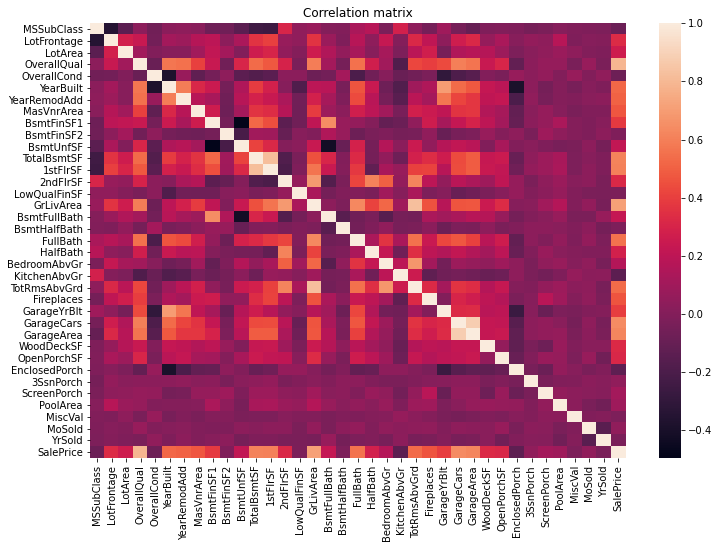

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.title("Correlation matrix")
sns.heatmap(df.corr())

In [13]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.329220
BsmtFinSF1       0.386420
GarageYrBlt      0.397778
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [14]:
# Get features with high correlation with the target feature
corr_features = [] 

for index, value in zip(df.corr()['SalePrice'].index, df.corr()['SalePrice'].values): 
    if value > .5: 
        corr_features.append(index)
        
print("Correlated features with target values: ")
print(corr_features)
print(len(corr_features))

Correlated features with target values: 
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


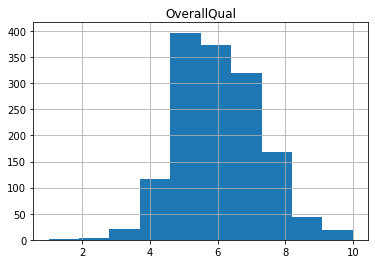

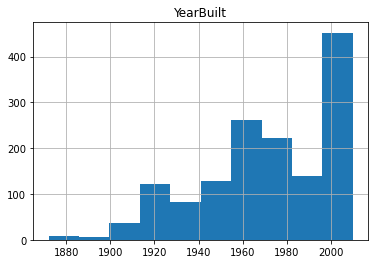

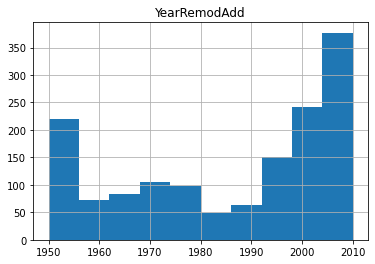

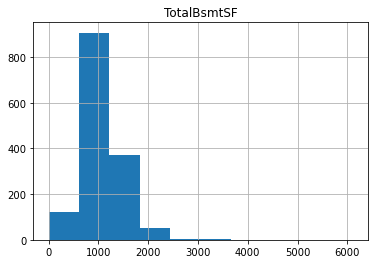

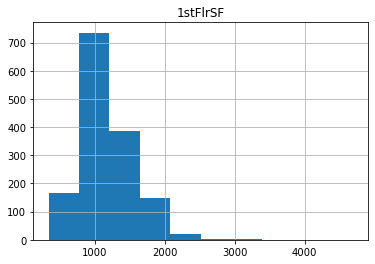

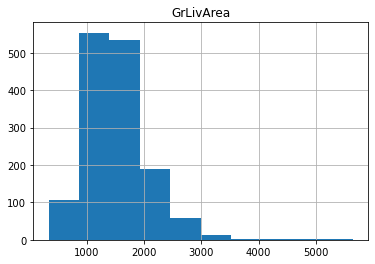

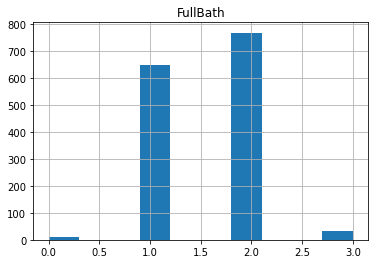

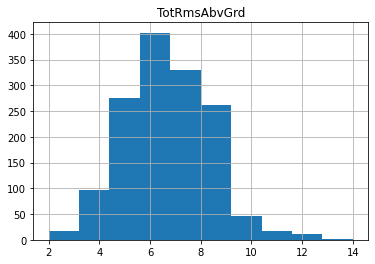

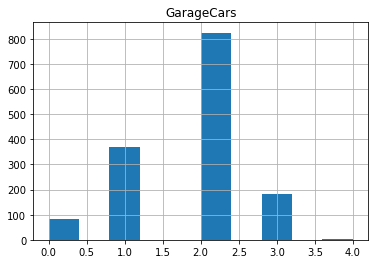

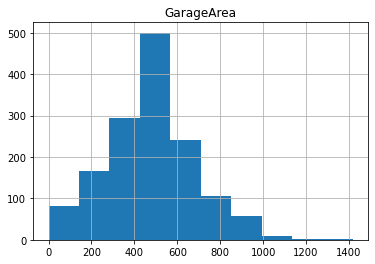

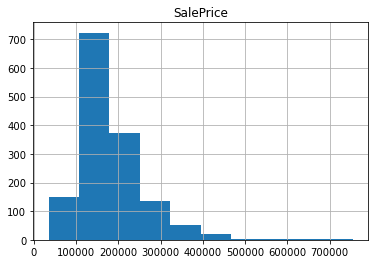

In [15]:
for feature in corr_features: 
    df[feature].hist()
    plt.title(feature)
    plt.show()

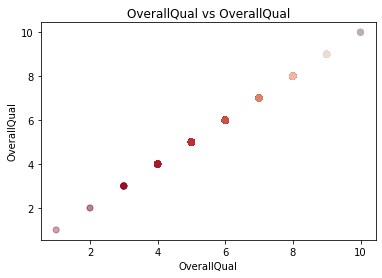

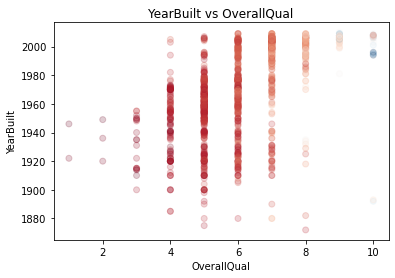

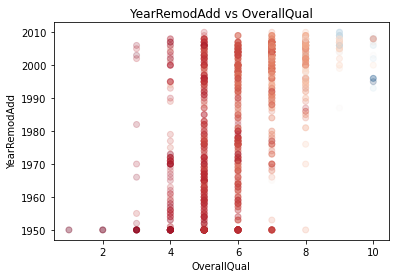

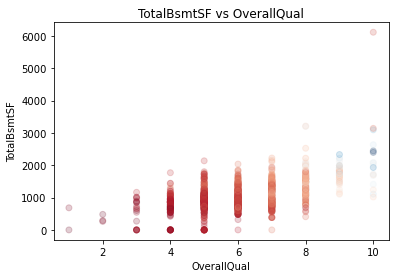

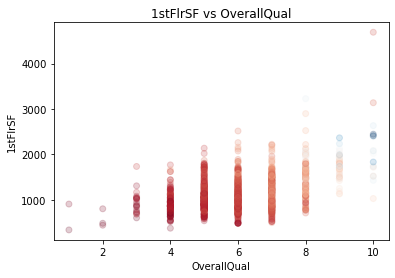

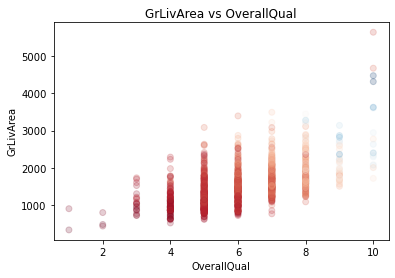

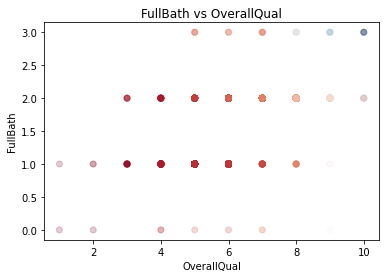

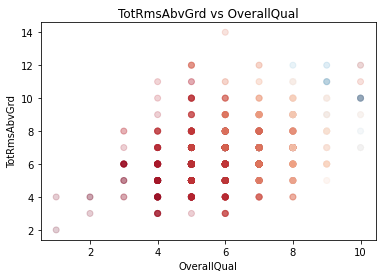

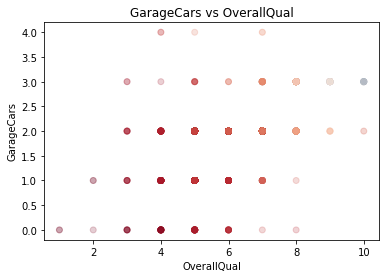

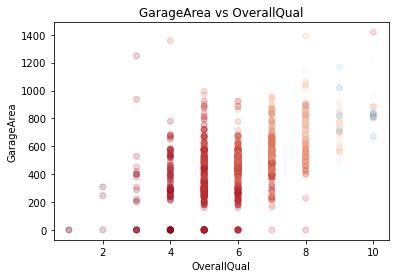

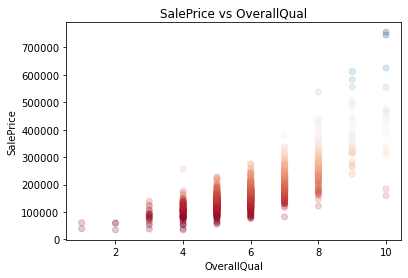

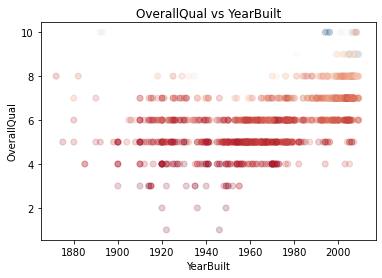

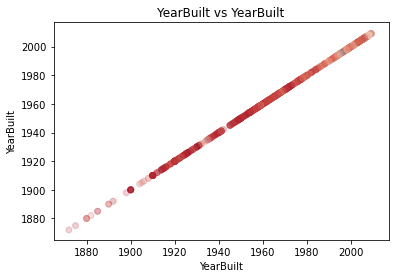

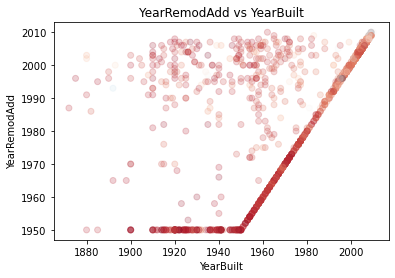

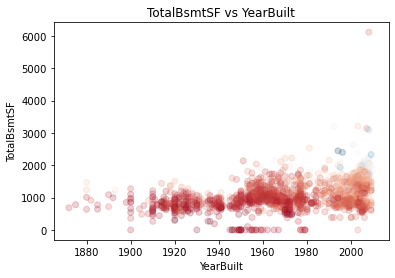

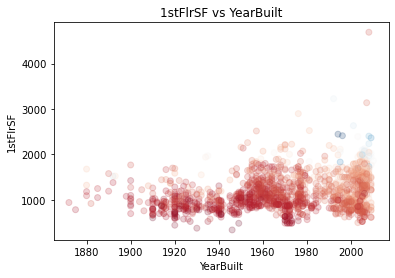

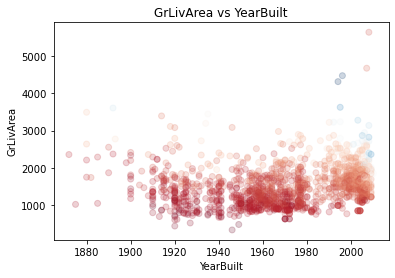

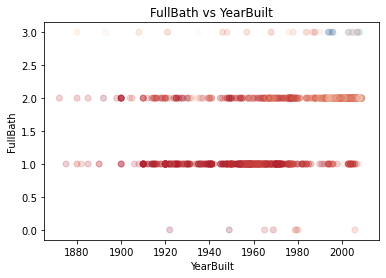

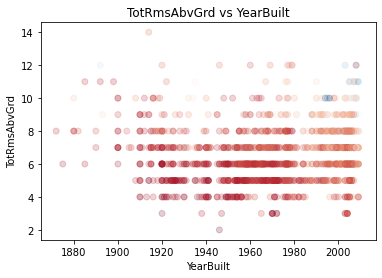

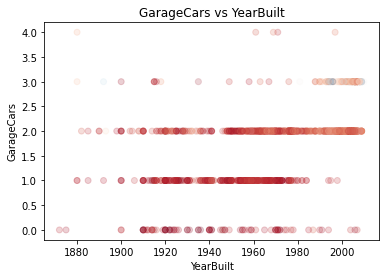

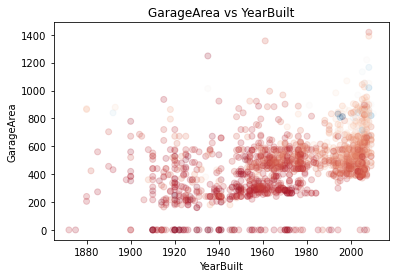

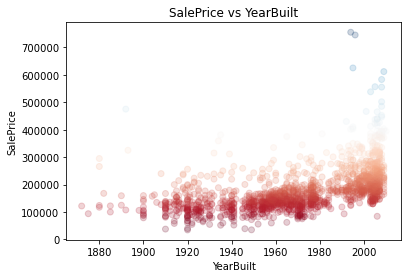

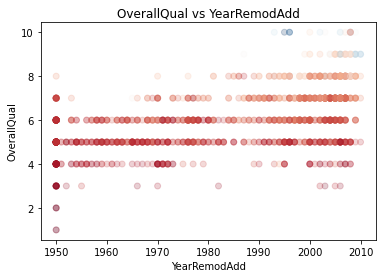

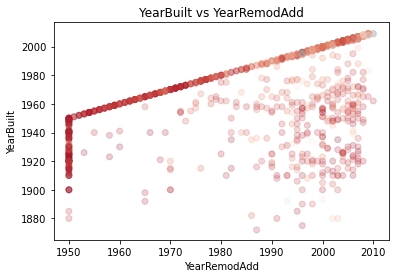

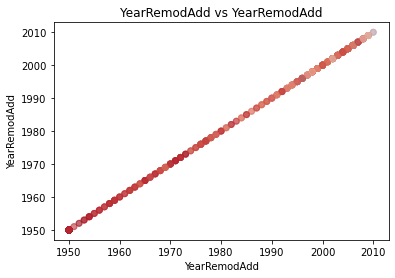

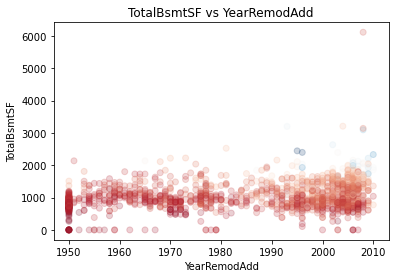

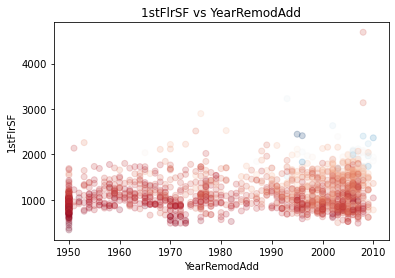

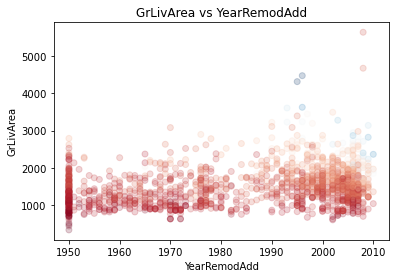

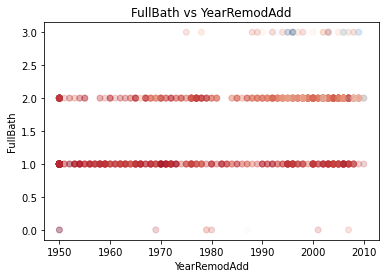

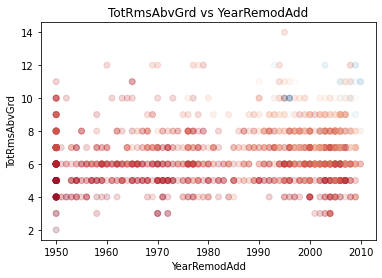

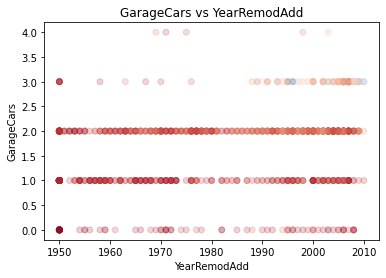

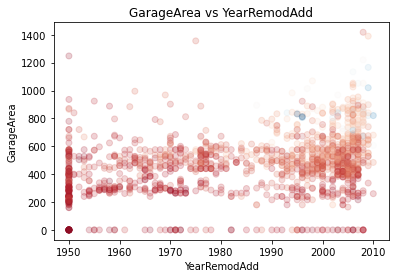

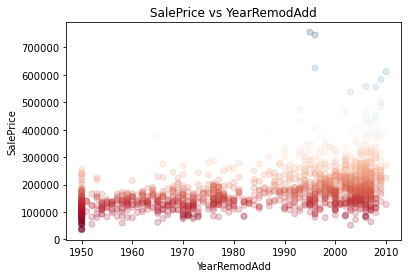

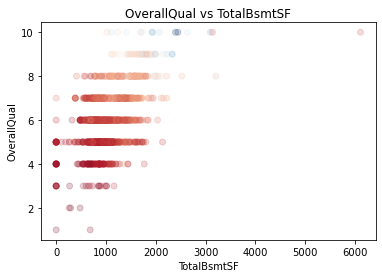

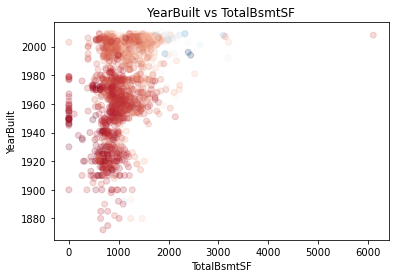

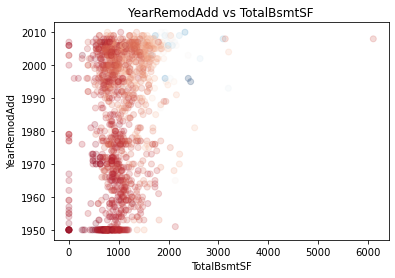

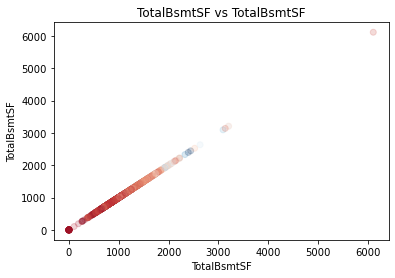

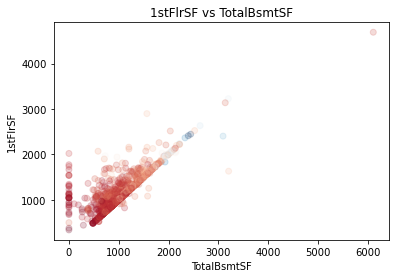

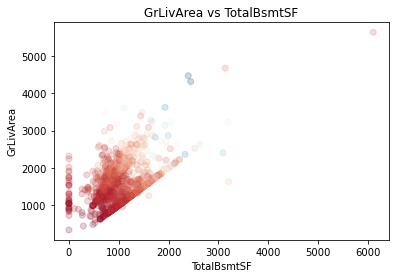

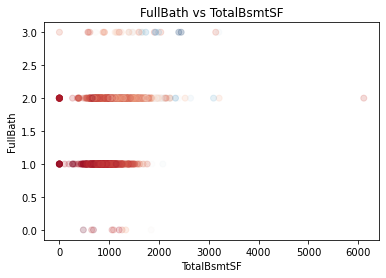

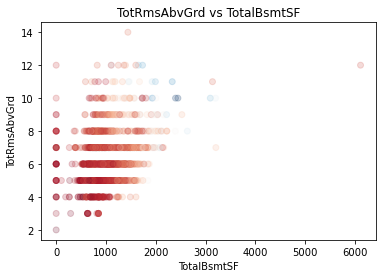

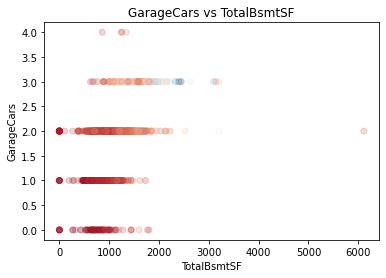

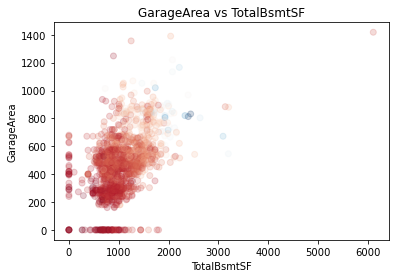

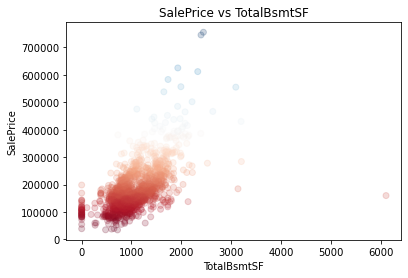

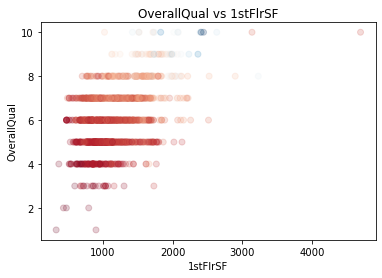

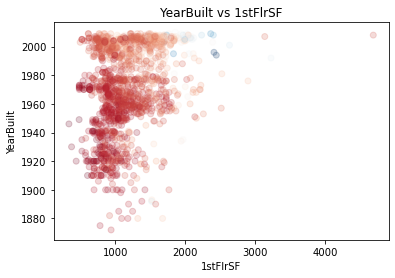

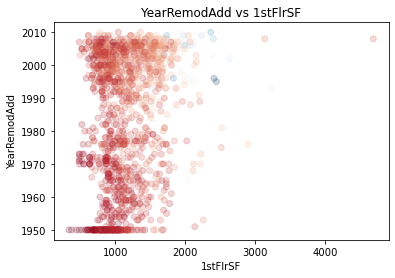

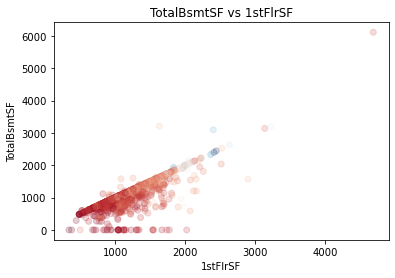

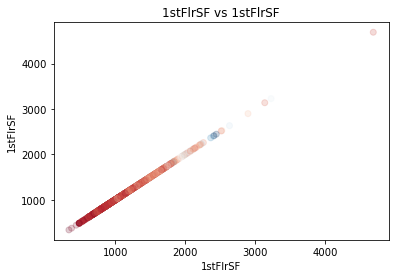

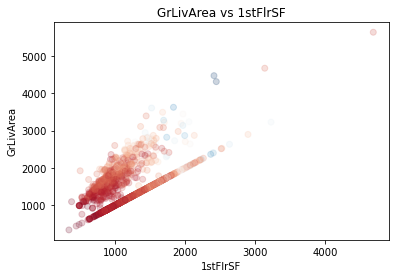

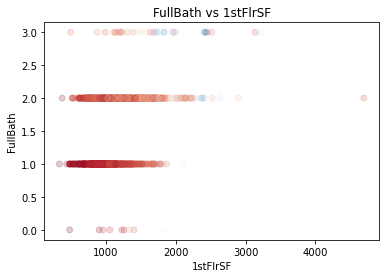

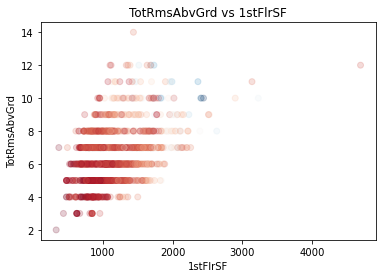

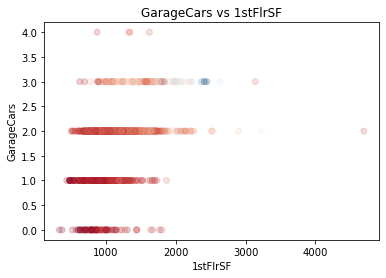

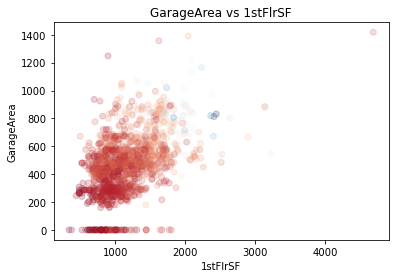

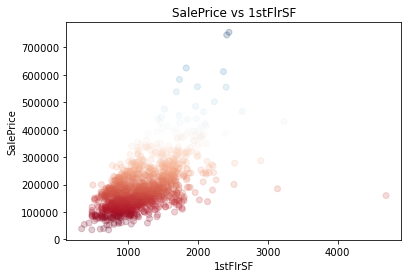

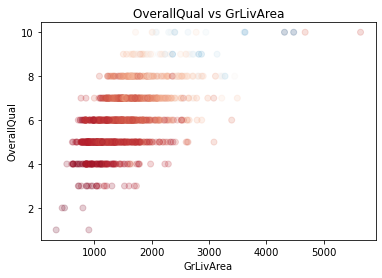

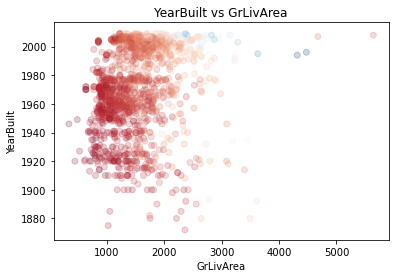

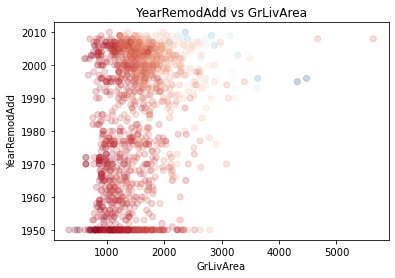

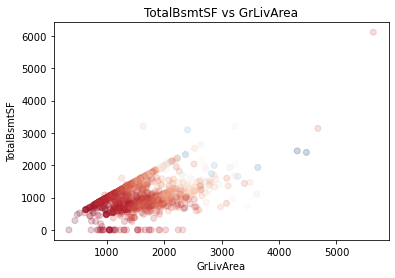

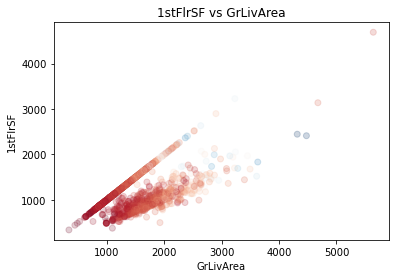

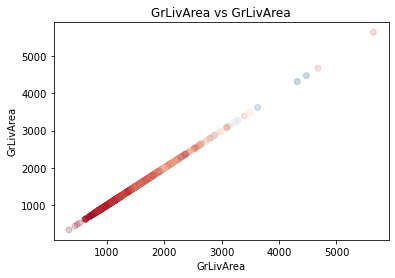

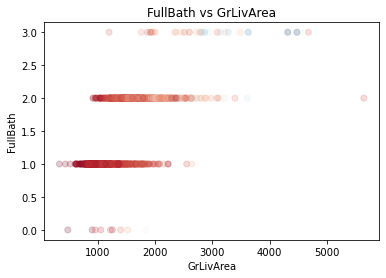

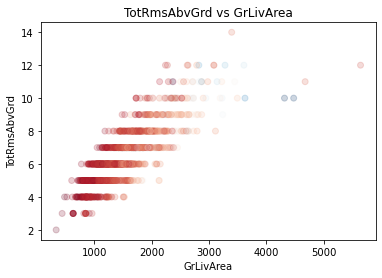

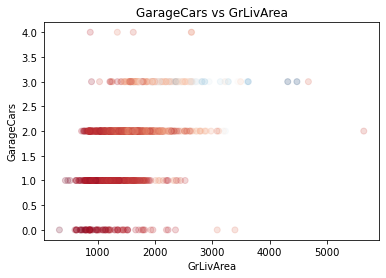

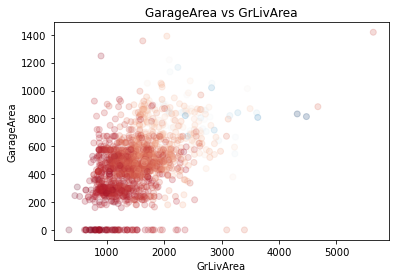

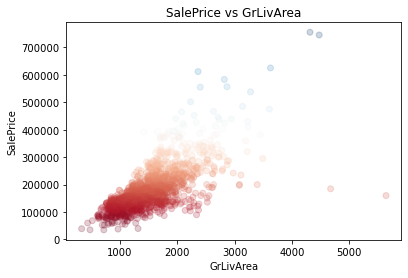

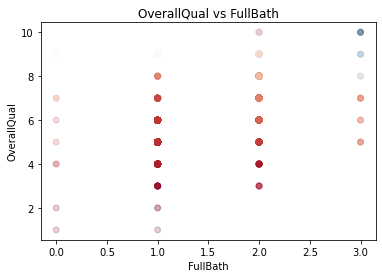

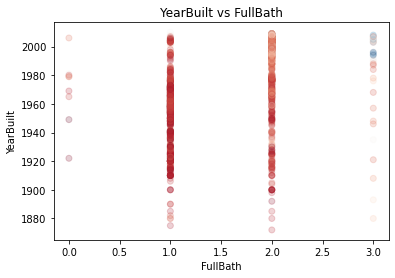

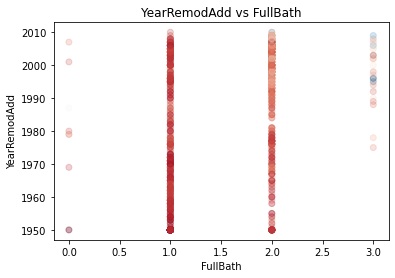

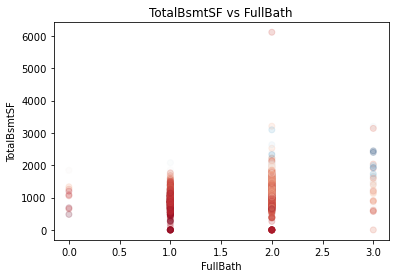

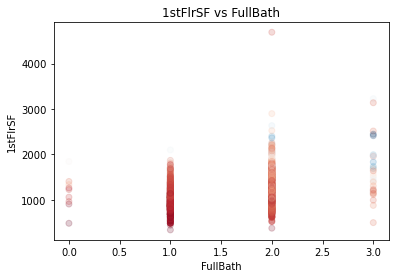

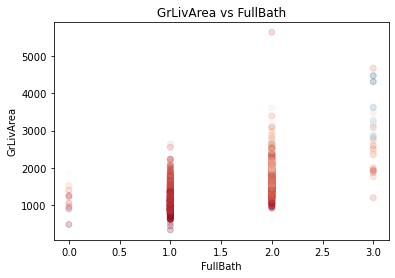

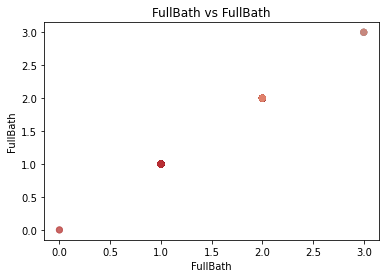

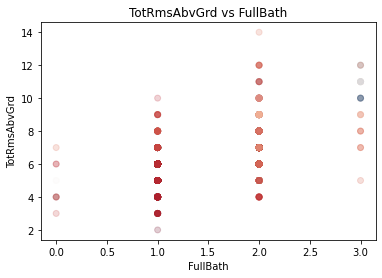

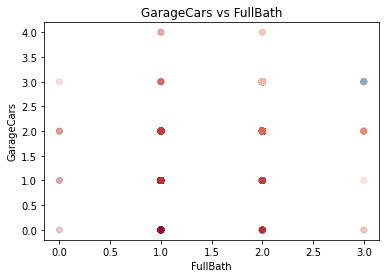

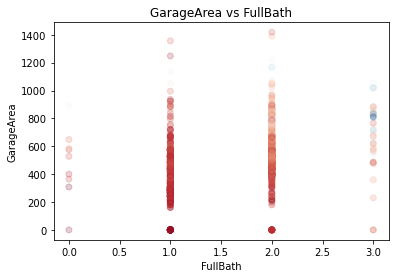

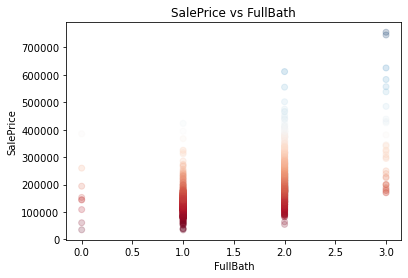

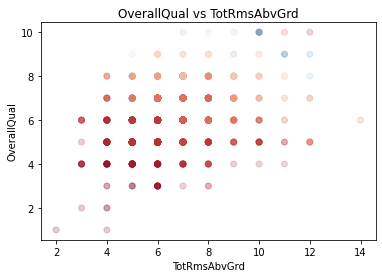

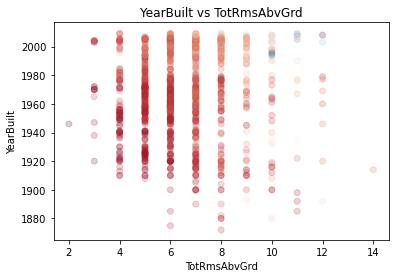

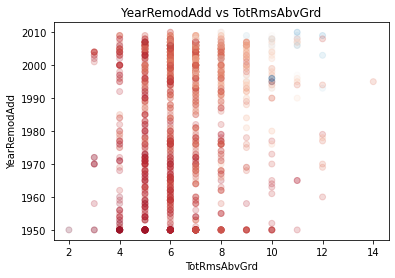

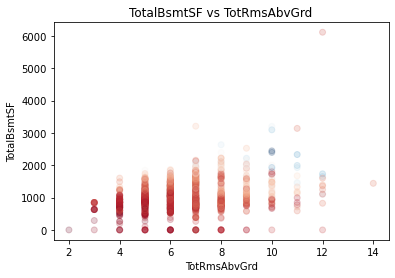

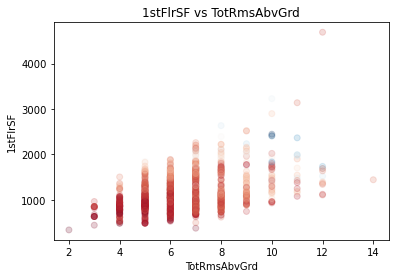

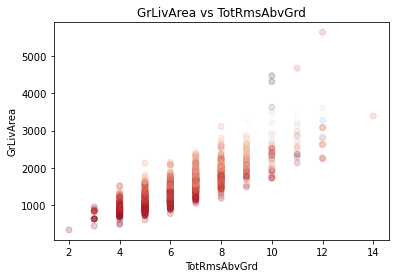

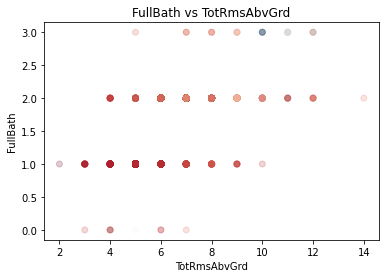

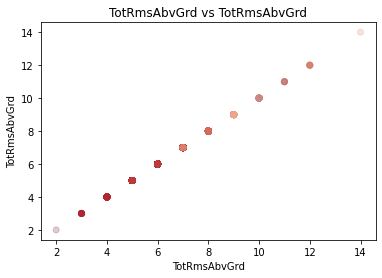

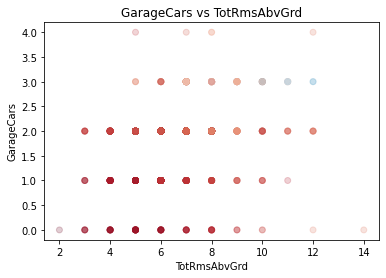

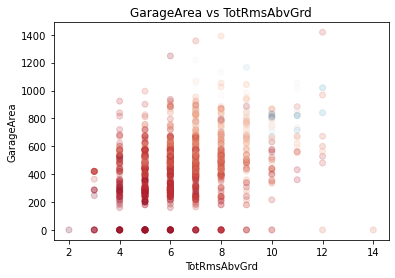

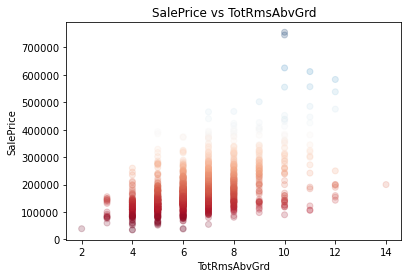

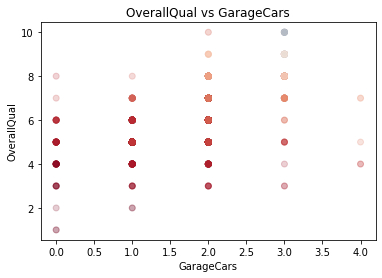

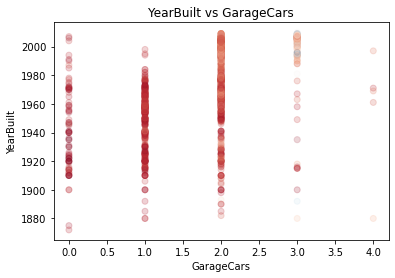

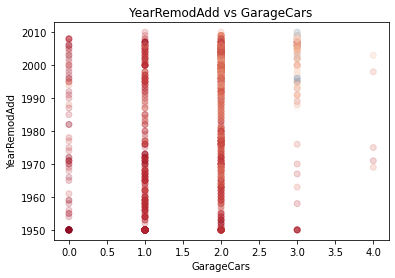

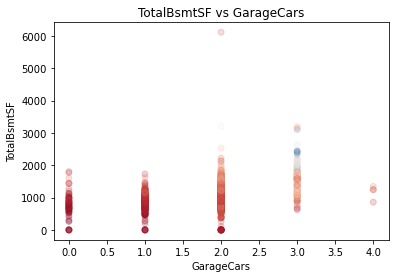

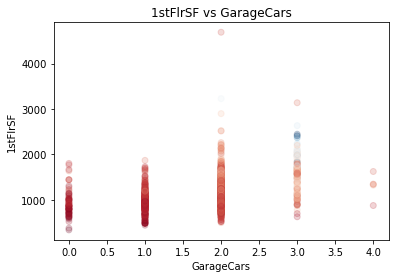

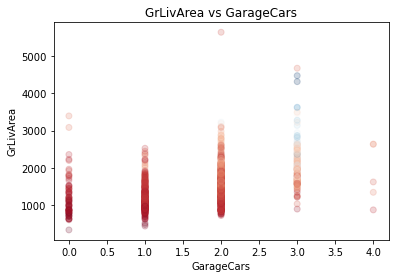

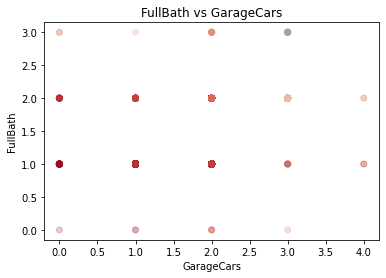

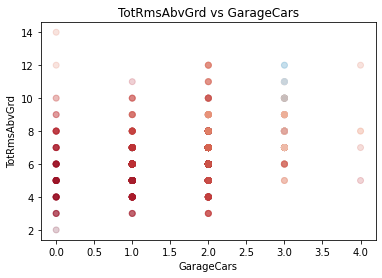

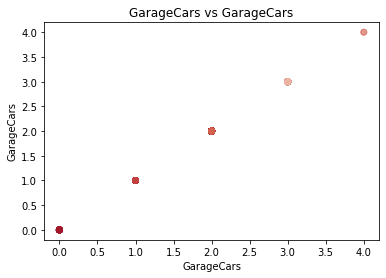

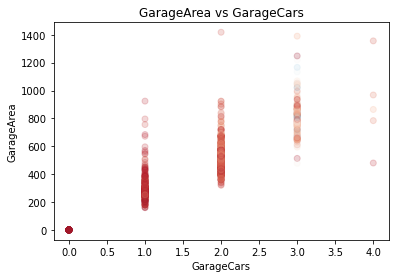

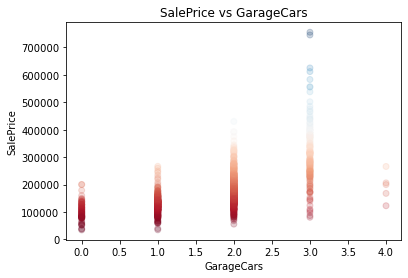

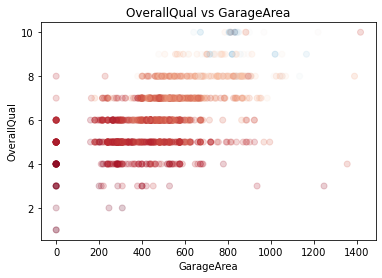

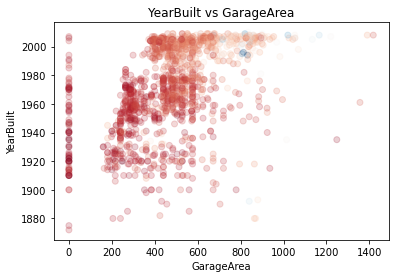

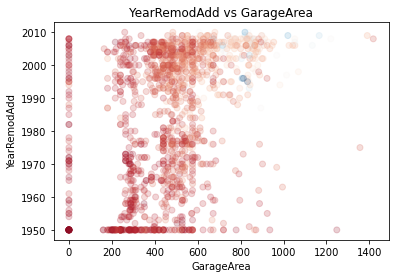

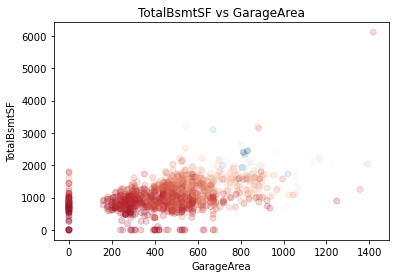

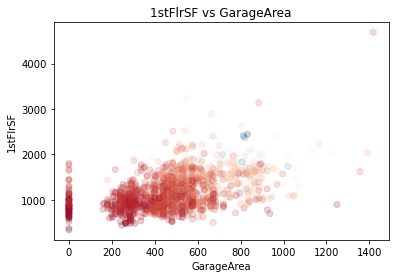

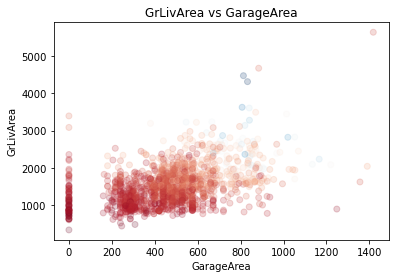

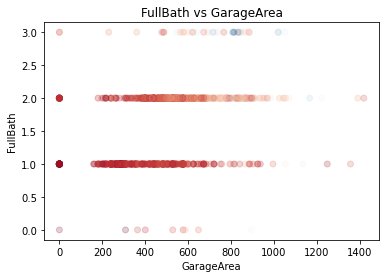

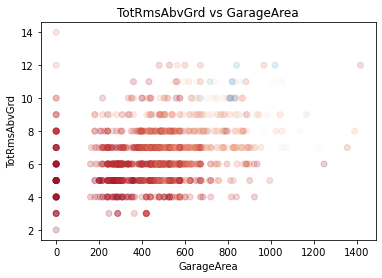

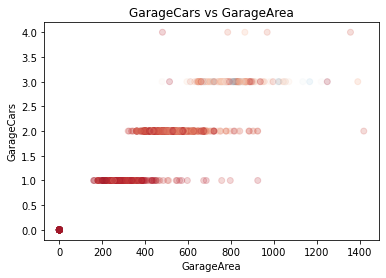

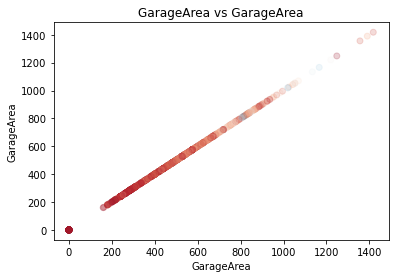

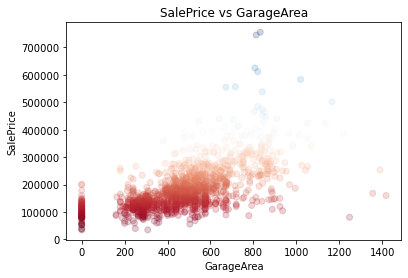

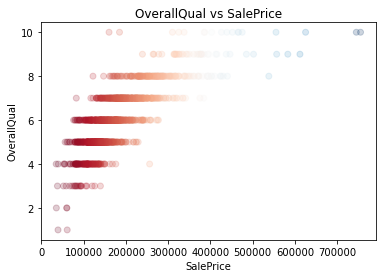

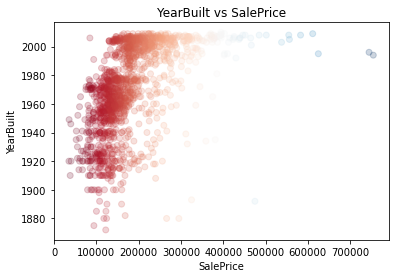

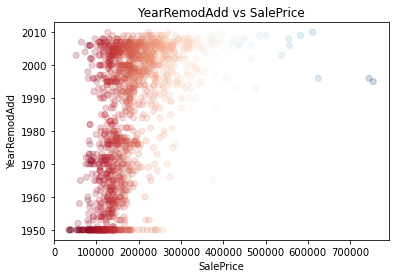

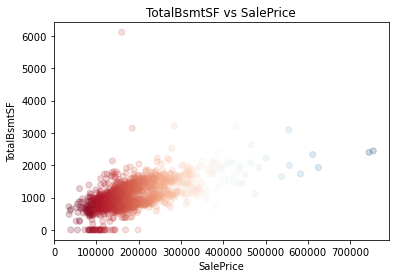

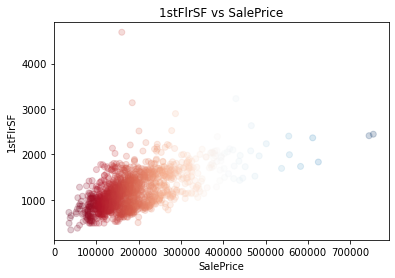

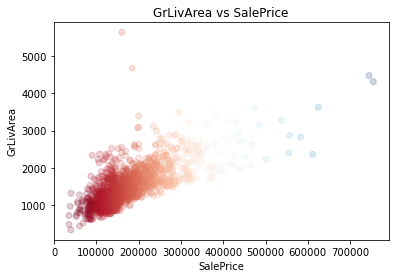

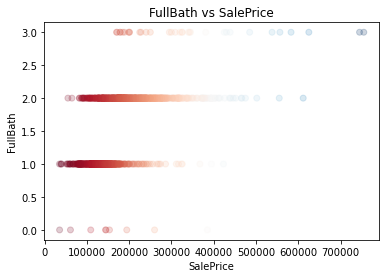

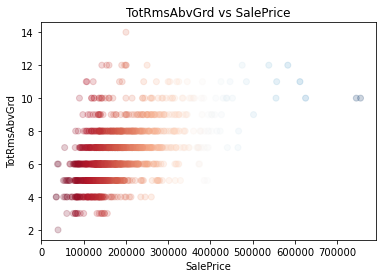

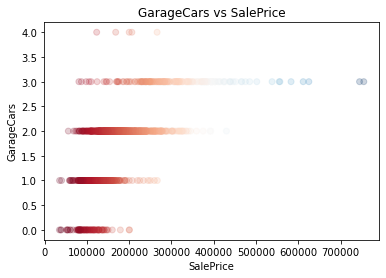

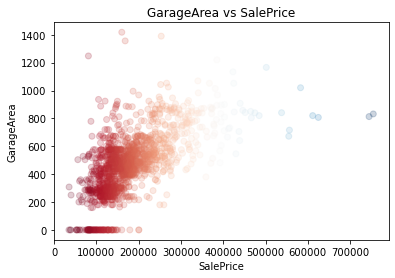

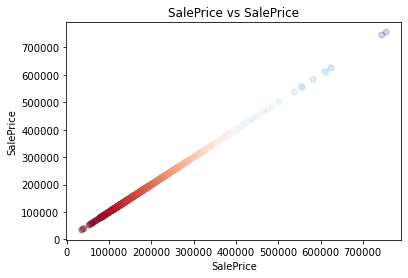

In [16]:
for xfeature in corr_features:
    for yfeature in corr_features: 
        plt.title("{} vs {}".format(yfeature, xfeature))
        plt.scatter(
            x = df[xfeature].values, y = df[yfeature].values, 
            alpha = .2, c = df.SalePrice, cmap = 'RdBu'
        )
        plt.ylabel(yfeature)
        plt.xlabel(xfeature)
        plt.show()

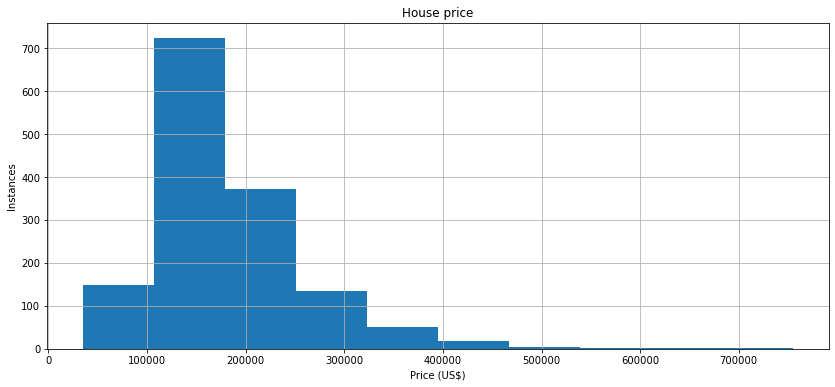

In [17]:
plt.figure(figsize=(14, 6))
plt.title("House price")
plt.ylabel("Instances")
plt.xlabel("Price (US$)")
df.SalePrice.hist()

In [18]:
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

df[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [19]:
df['Remodeled'] = (df.YearRemodAdd - df.YearBuilt) > 0
df['YearsHold'] = df.YrSold - df.YearBuilt

test['Remodeled'] = (test.YearRemodAdd - test.YearBuilt) > 0
test['YearsHold'] = test.YrSold - test.YearBuilt

In [20]:
year_features.append('Remodeled')
year_features.append("YearsHold")

df[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  Remodeled  YearsHold
0       2003          2003       2003.0    2008      False          5
1       1976          1976       1976.0    2007      False         31
2       2001          2002       2001.0    2008       True          7
3       1915          1970       1998.0    2006       True         91
4       2000          2000       2000.0    2008      False          8

In [21]:
porch_features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df['TotalPorchArea'] = df[porch_features].sum(axis=1)
df['PorchRate'] = df.TotalPorchArea / df.LotArea

test['TotalPorchArea'] = test[porch_features].sum(axis=1)
test['PorchRate'] = test.TotalPorchArea / test.LotArea

porch_features.append('TotalPorchArea')
porch_features.append('PorchRate')

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [22]:
df['BuiltWithGarage'] = df.GarageYrBlt == df.YearBuilt
df['OnlyOneCar'] = df.GarageCars == 1

test['BuiltWithGarage'] = test.GarageYrBlt == test.YearBuilt
test['OnlyOneCar'] = test.GarageCars == 1

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

### Categorical features encoding

In [23]:
# Check if there are same unique values in train and test set

diff_features = [] 

for feature in cat_features: 
    try: 
        print(test[feature].value_counts().sort_index().index == df[feature].value_counts().sort_index().index)
    except: 
        diff_features.append(feature)
        print(feature)
        print("Train set: ", len(df[feature].value_counts().sort_index().index))
        print("Test set: ", len(test[feature].value_counts().sort_index().index))
    print()

[ True  True  True  True  True]

[ True  True]

[ True  True  True  True]

[ True  True  True  True]

Utilities
Train set:  2
Test set:  1

[ True  True  True  True  True]

[ True  True  True]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]

[ True  True  True  True  True  True  True  True  True]

Condition2
Train set:  8
Test set:  5

[ True  True  True  True  True]

HouseStyle
Train set:  8
Test set:  7

[ True  True  True  True  True  True]

RoofMatl
Train set:  8
Test set:  4

Exterior1st
Train set:  15
Test set:  13

Exterior2nd
Train set:  16
Test set:  15

[ True  True  True  True]

[ True  True  True  True]

[ True  True  True  True  True]

[ True  True  True  True  True  True]

[ True  True  True  True]

[ True  True  True  True]

[ True  True  True  True]

[ True  True  True  True  True  True]

[ True  True  True  True  True  True]

Heating
Train set:  6
Test set:  4

[ 

In [24]:
# Check wich dataset has more unique values

for f in diff_features: 
    print(f)
    print(len(df[f].value_counts().index) > len(test[f].value_counts().index))

Utilities
True
Condition2
True
HouseStyle
True
RoofMatl
True
Exterior1st
True
Exterior2nd
True
Heating
True
Electrical
True
GarageQual
True


In [25]:
from sklearn.preprocessing import OneHotEncoder

categorical_values = {}

for feature in cat_features: 
    ohe = OneHotEncoder(sparse=False) 
    values = ohe.fit_transform(df[[feature]])
    test_values = ohe.transform(test[[feature]])
    
    for i in range(len(ohe.categories_[0])): 
        name = "is_{}".format(ohe.categories_[0][i])
        df[name] = values[:, i]
        test[name] = test_values[:, i]
        
print("Training dataset shape: ", df.shape)
print("Testing dataset shape: ", test.shape)

Training dataset shape:  (1460, 248)
Testing dataset shape:  (1459, 247)


In [26]:
df.drop(cat_features, axis=1, inplace=True)
test.drop(cat_features, axis=1, inplace=True)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Remodeled  YearsHold  TotalPorchArea  PorchRate  \
0     208500      False          5              61   0.007219   
1     181500      False         31               0   0.000000   
2     223500       True          7              42   0.003733   
3     140000       True         91             307   0.032147   
4     250000      False          8              84   0.005891   

   BuiltWithGarage  OnlyOneCar  is_C (all)  is_FV  is_RH  is_RL  is_RM  \
0             True       False         0.0    0.0    0.0    1.0    0.0   
1             True       False         0.0    0.0    0.0    1.0    0.0   
2             True       False         0.0    0.0    0.0    1.0    0.0   
3            False       False         0.0    0.0    0.0    1.0    0.0   
4             True       False         0.0    0.0    0.0    1.0    0.0   

   is_Grvl  is_Pave  is_IR1  is_IR2  is_IR3  is_Reg  is_Bnk  is_HLS  is_Low  \
0      0.0      1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
1      0.0      1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2      0.0      1.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      0.0      1.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      0.0      1.

In [27]:
df.replace({"True": 1, "False": 0}, inplace=True)
test.replace({"True": 1, "False": 0}, inplace=True)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Remodeled  YearsHold  TotalPorchArea  PorchRate  \
0     208500      False          5              61   0.007219   
1     181500      False         31               0   0.000000   
2     223500       True          7              42   0.003733   
3     140000       True         91             307   0.032147   
4     250000      False          8              84   0.005891   

   BuiltWithGarage  OnlyOneCar  is_C (all)  is_FV  is_RH  is_RL  is_RM  \
0             True       False         0.0    0.0    0.0    1.0    0.0   
1             True       False         0.0    0.0    0.0    1.0    0.0   
2             True       False         0.0    0.0    0.0    1.0    0.0   
3            False       False         0.0    0.0    0.0    1.0    0.0   
4             True       False         0.0    0.0    0.0    1.0    0.0   

   is_Grvl  is_Pave  is_IR1  is_IR2  is_IR3  is_Reg  is_Bnk  is_HLS  is_Low  \
0      0.0      1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
1      0.0      1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2      0.0      1.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      0.0      1.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      0.0      1.

In [28]:
print(df.shape)
print(test.shape)

(1460, 210)
(1459, 209)


### Feature scaling

In [29]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [30]:
print(X.shape)
print(test.shape)

(1460, 209)
(1459, 209)


In [31]:
from sklearn.preprocessing import StandardScaler 

feature_scaler = StandardScaler() 
X_scaled = feature_scaler.fit_transform(X)

test_scaled = feature_scaler.transform(test)

"""
target_scaler = StandardScaler() 
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))
"""
y_scaled = y

print("***** Train *****")
print("Standard deviation: {:.2f}".format(X_scaled.std()))
print("Mean: {:.2f}".format(X_scaled.mean()))
print("***** Test *****")
print("Standard deviation: {:.2f}".format(test_scaled.std()))
print("Mean: {:.2f}".format(test_scaled.mean()))

***** Train *****
Standard deviation: 1.00
Mean: 0.00
***** Test *****
Standard deviation: 0.99
Mean: -0.00


## Model evaluation

In [32]:
def printScore(crossValScore): 
    
    print("Training NMSE: ", crossValScore['train_score'].mean())
    print("Test NMSE: ", crossValScore['test_score'].mean())
    
    plt.plot(np.arange(len(crossValScore['test_score'])), -crossValScore['test_score'], label='Test')
    plt.plot(np.arange(len(crossValScore['train_score'])), -crossValScore['train_score'], label='Train')
    plt.legend()
    plt.title("Cross validation scoring")
    plt.ylabel("Mean squared error")
    plt.xlabel("Iteration")
    plt.show()

### Linear Regression

Training NMSE:  -500440483.8979452
Test NMSE:  -4.913023344850989e+35


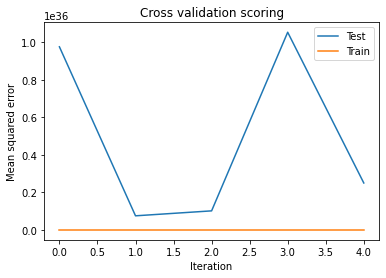

In [33]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_validate

linreg = LinearRegression()

scores = cross_validate(
    linreg, X_scaled, y_scaled, cv=5, return_train_score=True, 
    scoring = 'neg_mean_squared_error'
)

printScore(scores)

### Random Forest Regression

Training NMSE:  -126038117.84515543
Test NMSE:  -927651237.6181211


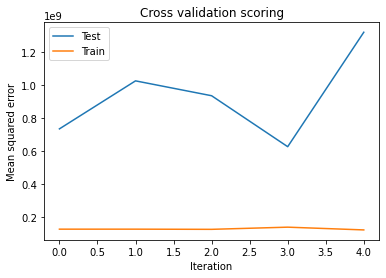

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor() 

scores = cross_validate(
    forest, X_scaled, y_scaled, cv=5, return_train_score=True, 
    scoring = 'neg_mean_squared_error'
)

printScore(scores)

### Lasso Regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32978935785.64624, tolerance: 759214014.2531197
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23490364079.838257, tolerance: 728773513.025937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59319278886.52356, tolerance: 699031751.5199751
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70067696612.

Training NMSE:  -498386450.7030686
Test NMSE:  -1251950765.448433


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43544670523.101074, tolerance: 724930391.3116124
  positive)


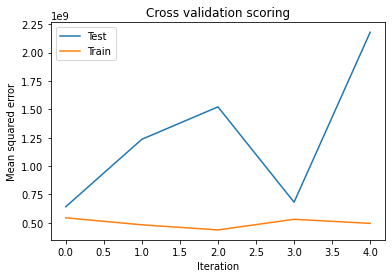

In [35]:
from sklearn.linear_model import Lasso 

lasso = Lasso() 

scores = cross_validate(
    lasso, X_scaled, y_scaled, cv=5, return_train_score=True, 
    scoring = 'neg_mean_squared_error'
)

printScore(scores)

Training NMSE:  -498405087.4807925
Test NMSE:  -1250179427.9558635


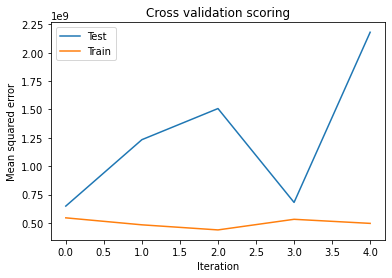

In [36]:
from sklearn.linear_model import Ridge 

ridge = Ridge() 

scores = cross_validate(
    ridge, X_scaled, y_scaled, cv=5, return_train_score=True, 
    scoring = 'neg_mean_squared_error'
)

printScore(scores)

### Convolutional Neural Network 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

In [38]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

results = model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=50
)

Epoch 1/50
22/22 [==============================] - 0s 9ms/step - loss: 39304806400.0000 - mean_squared_error: 39304806400.0000 - val_loss: 36785434624.0000 - val_mean_squared_error: 36785438720.0000
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 39256772608.0000 - mean_squared_error: 39256772608.0000 - val_loss: 36675014656.0000 - val_mean_squared_error: 36675014656.0000
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 38962782208.0000 - mean_squared_error: 38962782208.0000 - val_loss: 36079161344.0000 - val_mean_squared_error: 36079161344.0000
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 37689049088.0000 - mean_squared_error: 37689053184.0000 - val_loss: 33982863360.0000 - val_mean_squared_error: 33982861312.0000
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 34077386752.0000 - mean_squared_error: 34077386752.0000 - val_loss: 29011163136.0000 - val_mean_squared_error: 29011163136.0000


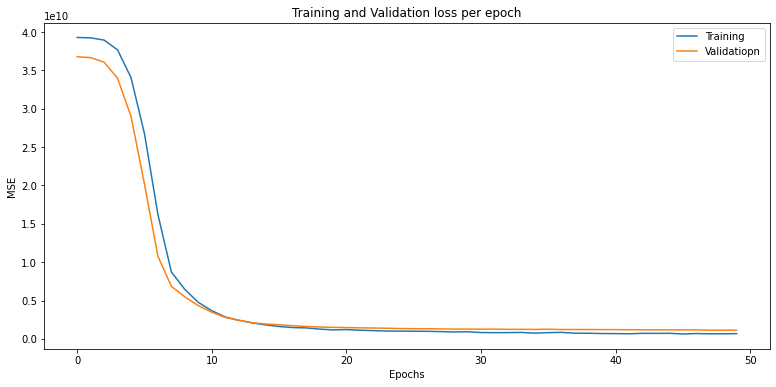

In [39]:
plt.figure(figsize=(13,6))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Training and Validation loss per epoch")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validatiopn'], loc='upper right')
plt.show()

In [40]:
values = model.evaluate(X_test, y_test)

print("\nRoot mean squared error: ")
print(np.sqrt(values))

10/10 [==============================] - 0s 887us/step - loss: 2378110720.0000 - mean_squared_error: 2378110720.0000

Root mean squared error: 
[48765.87659419 48765.87659419]


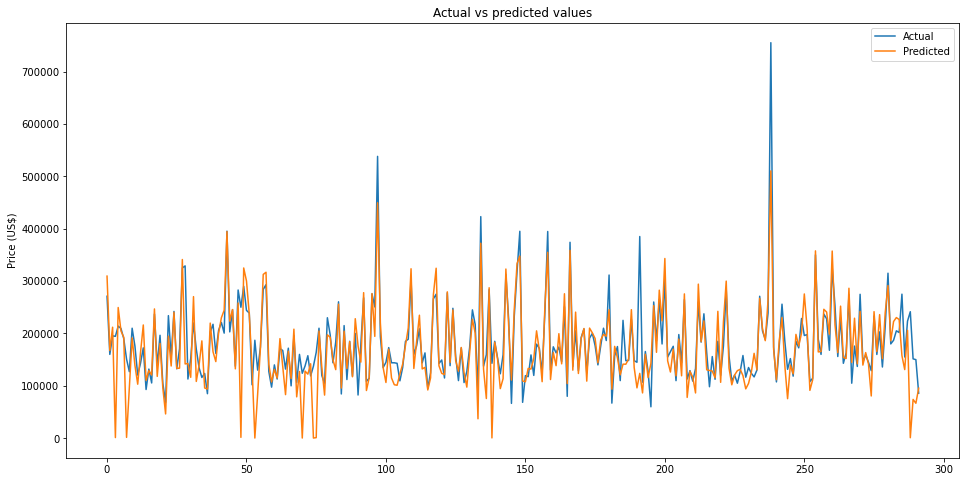

In [41]:
preds = model.predict(X_test)

plt.figure(figsize=(16, 8))
plt.title("Actual vs predicted values")
plt.plot(np.arange(preds.shape[0]), y_test, label="Actual")
plt.plot(np.arange(preds.shape[0]), preds, label="Predicted")
plt.ylabel("Price (US$)")
plt.legend()
plt.show()

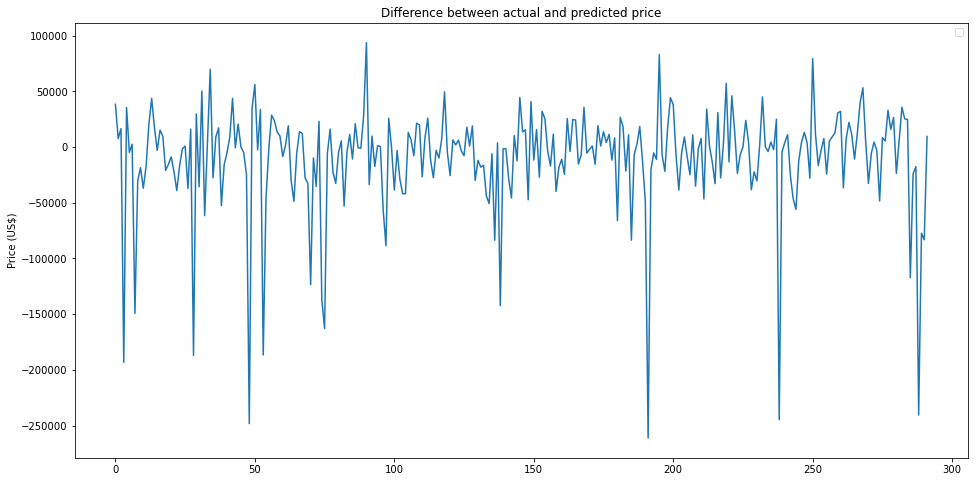

In [42]:
plt.figure(figsize=(16, 8))
plt.title("Difference between actual and predicted price")
plt.plot(np.arange(preds.shape[0]), preds-y_test.values.reshape(-1, 1))
plt.ylabel("Price (US$)")
plt.legend()
plt.show()

### PCA Dimensionality reduction

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_reduced = pca.fit_transform(X_scaled)
test_reduced = pca.transform(test_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_scaled, test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

X_train.shape

(1051, 138)

In [44]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

results = model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=50
)

Epoch 1/50
22/22 [==============================] - 0s 7ms/step - loss: 38776942592.0000 - mean_squared_error: 38776942592.0000 - val_loss: 40814571520.0000 - val_mean_squared_error: 40814571520.0000
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 38740545536.0000 - mean_squared_error: 38740545536.0000 - val_loss: 40733929472.0000 - val_mean_squared_error: 40733929472.0000
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 38572134400.0000 - mean_squared_error: 38572138496.0000 - val_loss: 40425242624.0000 - val_mean_squared_error: 40425246720.0000
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 38015676416.0000 - mean_squared_error: 38015676416.0000 - val_loss: 39568445440.0000 - val_mean_squared_error: 39568445440.0000
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 36557623296.0000 - mean_squared_error: 36557623296.0000 - val_loss: 37618581504.0000 - val_mean_squared_error: 37618581504.0000


In [45]:
values = model.evaluate(X_test, y_test)

print("\nRoot mean squared error: ")
print(np.sqrt(values))

10/10 [==============================] - 0s 1ms/step - loss: 806564352.0000 - mean_squared_error: 806564352.0000

Root mean squared error: 
[28400.07661961 28400.07661961]


## Make predictions

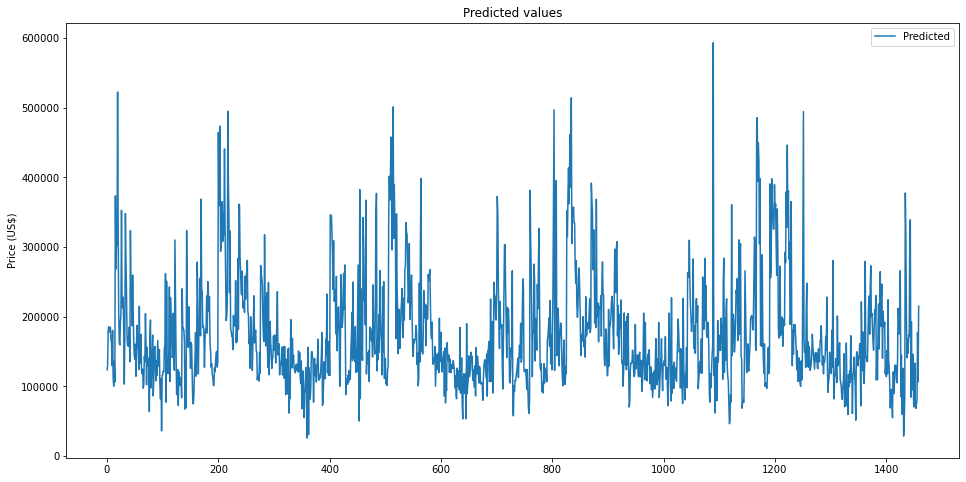

In [46]:
predictions = model.predict(test_reduced)

plt.figure(figsize=(16, 8))
plt.title("Predicted values")
plt.plot(np.arange(predictions.shape[0]), predictions, label="Predicted")
plt.ylabel("Price (US$)")
plt.legend()
plt.show()

In [47]:
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [48]:
# Export predictions to csv file

output = pd.DataFrame(
    data = {'Id': test_id.values.reshape(len(test_id)).tolist(), 'SalePrice': predictions.reshape(len(predictions)).tolist()},
    columns = ['Id', 'SalePrice']
)

print(output.shape)
output.head()

(1459, 2)


Id      SalePrice
0  1461  123504.734375
1  1462  128558.945312
2  1463  179153.500000
3  1464  185487.812500
4  1465  180906.187500

In [49]:
output.to_csv('Output.csv', index=False)